In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_a(deg_true):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    
    Returns:
    a: (np array of size (deg_true + 1)) coefficients of polynomial g
    """
    return 5 * np.random.randn(deg_true + 1)

def get_design_mat(x, deg):
    """
    Inputs:
    x: (np.array of size N)
    deg: (int) max degree used to generate the design matrix
    
    Returns:
    X: (np.array of size N x (deg_true + 1)) design matrix
    """
    X = np.array([x ** i for i in range(deg + 1)]).T
    return X

def draw_sample(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a
    return x, y

def draw_sample_with_noise(deg_true, a, N):  
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """  
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a + np.random.randn(N)
    return x, y


In [2]:
def least_square_estimator(X,y):
    """
    Inputs:
    X: Design Matrix
    y: True Value
    
    
    Returns:
    b: parametrized vector that estimates in terms of least square estimator
       (spits out an error message if not full rank)
    """
    N = np.shape(X)[0]
    d = np.shape(X)[1]-1
    if N<=d:
        b = 'Error'
    else:
        b = np.linalg.inv(X.T@X)@X.T@y
    return b 

In [3]:
def emprical_risk(X,y,b):
    """
    Inputs:
    X: Design Matrix
    y: True Value
    b: Parametrized predictor
    
    Returns:
    E_R: Empirical Risk
    """
    N = np.shape(X)[0]
    E_R = (1/(2*N))*np.linalg.norm(X@b-y)**2
    
    return E_R
    

[ 8.56288371e+00  1.07096328e+01  4.65342018e+00 -2.05182005e-09
 -1.71712600e-08  9.14042175e-09]
[ 8.56288371 10.70963278  4.65342019]
They seem almost identical


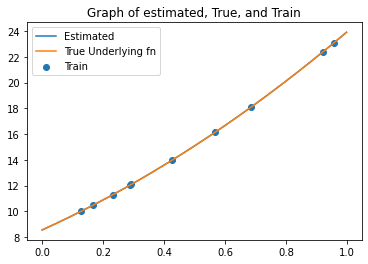

In [4]:
# dimension 5 case, given N is 10
N = 10
d = 5
# get some random values

deg_true = 2
a = get_a(deg_true)

# train data and test data
x_train, y_train = draw_sample(deg_true, a, N)
x_test, y_test = draw_sample(deg_true,a,1000)

# design matrix both train and test
X_train = get_design_mat(x_train,d)
X_test = get_design_mat(x_test,d)

# parametrized predictor
b = least_square_estimator(X_train,y_train)
fb = X_test@b


# Compare b with a
print(b)
print(a)
print("They seem almost identical")


# plots
plt.plot(x_test,fb)
plt.plot(x_test,y_test)
plt.scatter(x_train,y_train)
plt.title('Graph of estimated, True, and Train')
plt.legend(["Estimated","True Underlying fn","Train"])
plt.show()

In [5]:
# Check to see the emprical risk
emp_r = emprical_risk(X_test,y_test,b)
print(emp_r)

2.2001763367432392e-18


In [6]:
# Minimum Risk by checking many possible dimension
d = 10
# list of risk
risk = []
for i in range(1,d):

    X_train = get_design_mat(x_train,i)
    X_test = get_design_mat(x_test,i)
    b = least_square_estimator(X_train,y_train)
    emp_r = emprical_risk(X_test,y_test,b)
    print("Risk for d =",i,"is",emp_r)
    risk.append(emp_r)

risk = np.array(risk)
minimum_d = np.argmin(risk)
print(minimum_d+1)


Risk for d = 1 is 0.07130280045426646
Risk for d = 2 is 1.0269904023755524e-26
Risk for d = 3 is 2.3789674800430412e-24
Risk for d = 4 is 3.610362265189484e-20
Risk for d = 5 is 2.2001763367432392e-18
Risk for d = 6 is 3.473282458699697e-14
Risk for d = 7 is 6.089889688964278e-11
Risk for d = 8 is 1.4297771245814775e-05
Risk for d = 9 is 1270.5977170208214
2


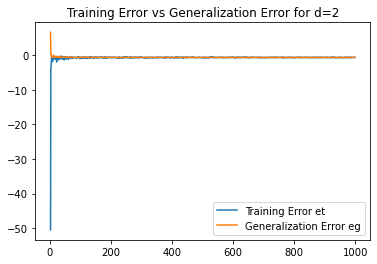

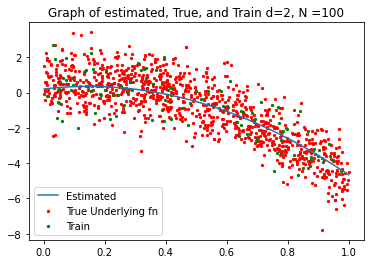

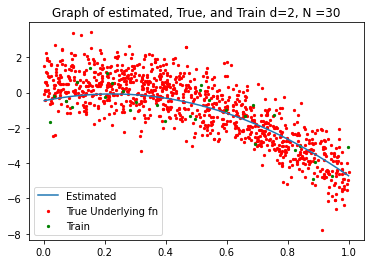

In [7]:
# Test error should be based on big number of samples
# Trying d= 2,5,10 
# Case for d= 2
d = 2
deg_true = 2
et = []
eg = []
axis = list(range(d+1,1000))

a = get_a(deg_true)
x_test, y_test = draw_sample_with_noise(deg_true, a, 1000)

X_test = get_design_mat(x_test,deg_true)

for N in range(d+1,1000):
    x_train, y_train = draw_sample_with_noise(deg_true, a, N)
    X_train = get_design_mat(x_train,d)
    b = least_square_estimator(X_train,y_train)
    emp_r_train = emprical_risk(X_train,y_train,b)
    et.append(np.log(emp_r_train))
    emp_r_generalization = emprical_risk(X_test,y_test,b)
    eg.append(np.log(emp_r_generalization))

    
plt.figure()
plt.title('Training Error vs Generalization Error for d=2')
plt.plot(axis,et)
plt.plot(axis,eg)
plt.legend(["Training Error et","Generalization Error eg"])



N =100
x_train, y_train = draw_sample_with_noise(deg_true, a, N)
X_train = get_design_mat(x_train,d)
b = least_square_estimator(X_train,y_train)
fb = X_test@b


plt.figure()
plt.title('Graph of estimated, True, and Train d=2, N =100')
plt.plot(x_test,fb)
plt.scatter(x_test,y_test, s= 5, color = 'red')
plt.scatter(x_train,y_train, s= 5, color='green')
plt.legend(["Estimated","True Underlying fn","Train"])



N = 30
x_train, y_train = draw_sample_with_noise(deg_true, a, N)
X_train = get_design_mat(x_train,d)
b = least_square_estimator(X_train,y_train)
fb = X_test@b

plt.figure()
plt.title('Graph of estimated, True, and Train d=2, N =30')
plt.plot(x_test,fb)
plt.scatter(x_test,y_test, s= 5, color = 'red')
plt.scatter(x_train,y_train, s= 5, color = 'green')
plt.legend(["Estimated","True Underlying fn","Train"])



plt.show()



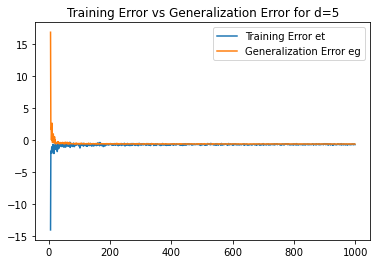

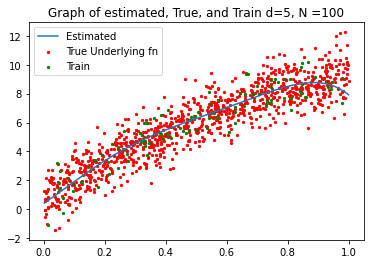

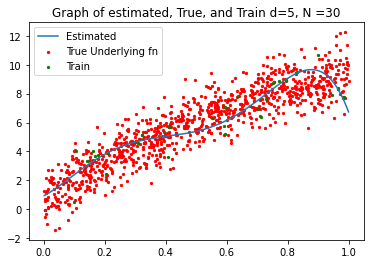

In [8]:
# Case for d =5
d = 5
deg_true = 2
et = []
eg = []
axis = list(range(d+1,1000))

a = get_a(deg_true)
x_test, y_test = draw_sample_with_noise(deg_true, a, 1000)

# X_test = get_design_mat(x_test,deg_true)


for N in range(d+1,1000):
    x_train, y_train = draw_sample_with_noise(deg_true, a, N)
    X_train = get_design_mat(x_train,d)
    X_test = get_design_mat(x_test,d)
    b = least_square_estimator(X_train,y_train)
    emp_r_train = emprical_risk(X_train,y_train,b)
    et.append(np.log(emp_r_train))
    emp_r_generalization = emprical_risk(X_test,y_test,b)
    eg.append(np.log(emp_r_generalization))

    
plt.figure()
plt.title('Training Error vs Generalization Error for d=5')
plt.plot(axis,et)
plt.plot(axis,eg)
plt.legend(["Training Error et","Generalization Error eg"])



N =100
x_train, y_train = draw_sample_with_noise(deg_true, a, N)
X_train = get_design_mat(x_train,d)
b = least_square_estimator(X_train,y_train)
fb = X_test@b


plt.figure()
plt.title('Graph of estimated, True, and Train d=5, N =100')
plt.plot(x_test,fb)
plt.scatter(x_test,y_test, s= 5, color = 'red')
plt.scatter(x_train,y_train, s= 5, color='green')
plt.legend(["Estimated","True Underlying fn","Train"])




N = 30
x_train, y_train = draw_sample_with_noise(deg_true, a, N)
X_train = get_design_mat(x_train,d)
b = least_square_estimator(X_train,y_train)
fb = X_test@b

plt.figure()
plt.title('Graph of estimated, True, and Train d=5, N =30')
plt.plot(x_test,fb)
plt.scatter(x_test,y_test, s= 5, color = 'red')
plt.scatter(x_train,y_train, s= 5, color='green')
plt.legend(["Estimated","True Underlying fn","Train"])




plt.show()



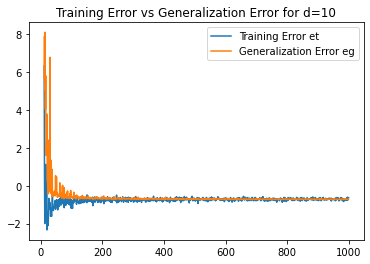

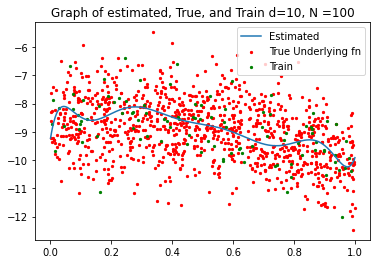

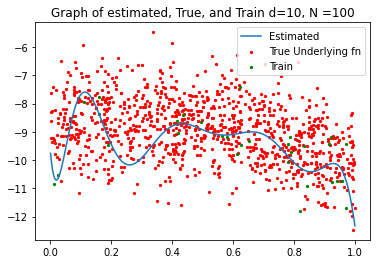

In [9]:
# Case for d =10
d = 10
deg_true = 2
et = []
eg = []
axis = list(range(d+1,1000))

a = get_a(deg_true)
x_test, y_test = draw_sample_with_noise(deg_true, a, 1000)

# X_test = get_design_mat(x_test,deg_true)


for N in range(d+1,1000):
    x_train, y_train = draw_sample_with_noise(deg_true, a, N)
    X_train = get_design_mat(x_train,d)
    X_test = get_design_mat(x_test,d)
    b = least_square_estimator(X_train,y_train)
    emp_r_train = emprical_risk(X_train,y_train,b)
    et.append(np.log(emp_r_train))
    emp_r_generalization = emprical_risk(X_test,y_test,b)
    eg.append(np.log(emp_r_generalization))

    
plt.figure()
plt.title('Training Error vs Generalization Error for d=10')
plt.plot(axis,et)
plt.plot(axis,eg)
plt.legend(["Training Error et","Generalization Error eg"])



N =100
x_train, y_train = draw_sample_with_noise(deg_true, a, N)
X_train = get_design_mat(x_train,d)
b = least_square_estimator(X_train,y_train)
fb = X_test@b


plt.figure()
plt.title('Graph of estimated, True, and Train d=10, N =100')
plt.plot(x_test,fb)
plt.scatter(x_test,y_test, s= 5, color = 'red')
plt.scatter(x_train,y_train, s= 5, color='green')
plt.legend(["Estimated","True Underlying fn","Train"])



N = 30
x_train, y_train = draw_sample_with_noise(deg_true, a, N)
X_train = get_design_mat(x_train,d)
b = least_square_estimator(X_train,y_train)
fb = X_test@b

plt.figure()
plt.title('Graph of estimated, True, and Train d=10, N =100')
plt.plot(x_test,fb)
plt.scatter(x_test,y_test, s= 5, color = 'red')
plt.scatter(x_train,y_train, s= 5, color='green')
plt.legend(["Estimated","True Underlying fn","Train"])




plt.show()



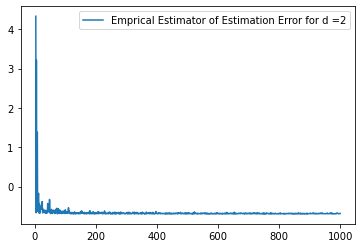

In [10]:
# Empirical Estimator of the Estimation Error
# Estimation Error = R(f_hat_H) - R(f_H)
# Emprical Estimator of the Estimation Error = Emp_R(f_hat_H_noise) - Emp_R(True_Underlying_Function)

# Case d = 2

d = 2
deg_true = 2
a = get_a(deg_true)
x_test, y_test = draw_sample_with_noise(deg_true,a,1000)



et = []
eg = []

# Empirical Estimator of Estimation Error
est_err = []


# fn without noise without any noise
    
x_test_wo, y_test_wo =draw_sample(deg_true, a, 1000)


for N in range(d+1,1000):
    x_train, y_train = draw_sample_with_noise(deg_true, a, N)
    X_train = get_design_mat(x_train,d)
    X_test = get_design_mat(x_test,d)
    b = least_square_estimator(X_train,y_train)
    emp_r_train = emprical_risk(X_train,y_train,b)
    et.append(np.log(emp_r_train))
    emp_r_generalization = emprical_risk(X_test,y_test,b)
    eg.append(np.log(emp_r_generalization))
    
    # train without noise
    x_train_wo, y_train_wo = draw_sample(deg_true, a, N)
    X_train_wo = get_design_mat(x_train_wo,d)
    X_test_wo = get_design_mat(x_test_wo,d)
    b_wo = least_square_estimator(X_train_wo,y_train_wo)
    emp_r_generalization_wo = emprical_risk(X_test_wo,y_test_wo,b_wo)
    est_err.append(np.log(emp_r_generalization-emp_r_generalization_wo))

axis = list(range(d+1,1000))
plt.plot(axis,est_err)

plt.legend(['Emprical Estimator of Estimation Error for d =2'])
plt.show()

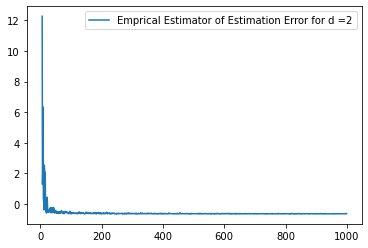

In [11]:
# Case d = 5
d = 5
deg_true = 2
a = get_a(deg_true)
x_test, y_test = draw_sample_with_noise(deg_true,a,1000)
# X_test = get_design_mat(x_test,deg_true)


et = []
eg = []

# Empirical Estimator of Estimation Error
est_err = []


# fn without noise without any noise
    
x_test_wo, y_test_wo =draw_sample(deg_true, a, 1000)
# X_test_wo = get_design_mat(x_test_wo,deg_true)

for N in range(d+1,1000):
    x_train, y_train = draw_sample_with_noise(deg_true, a, N)
    X_train = get_design_mat(x_train,d)
    X_test = get_design_mat(x_test,d)
    b = least_square_estimator(X_train,y_train)
    emp_r_train = emprical_risk(X_train,y_train,b)
    et.append(np.log(emp_r_train))
    emp_r_generalization = emprical_risk(X_test,y_test,b)
    eg.append(np.log(emp_r_generalization))
    
    # train without noise
    x_train_wo, y_train_wo = draw_sample(deg_true, a, N)
    X_train_wo = get_design_mat(x_train_wo,d)
    X_test_wo = get_design_mat(x_test_wo,d)
    b_wo = least_square_estimator(X_train_wo,y_train_wo)
    emp_r_generalization_wo = emprical_risk(X_test_wo,y_test_wo,b_wo)
    est_err.append(np.log(emp_r_generalization-emp_r_generalization_wo))

axis = list(range(d+1,1000))
plt.plot(axis,est_err)
plt.legend(['Emprical Estimator of Estimation Error for d =2'])
plt.show()

/var/folders/gb/zw91jmc17d950cfmd43jqc7c0000gn/T/ipykernel_16552/1004380767.py:37: RuntimeWarning: invalid value encountered in log
  est_err.append(np.log(emp_r_generalization-emp_r_generalization_wo))


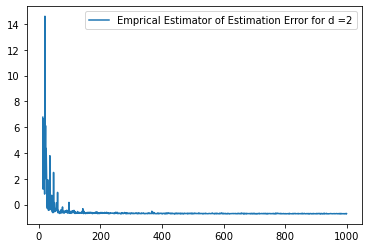

In [12]:
# Case d = 10
d = 10
deg_true = 2
a = get_a(deg_true)
x_test, y_test = draw_sample_with_noise(deg_true,a,1000)
# X_test = get_design_mat(x_test,deg_true)


et = []
eg = []

# Empirical Estimator of Estimation Error
est_err = []


# fn without noise without any noise
    
x_test_wo, y_test_wo =draw_sample(deg_true, a, 1000)
# X_test_wo = get_design_mat(x_test_wo,deg_true)

for N in range(d+1,1000):
    x_train, y_train = draw_sample_with_noise(deg_true, a, N)
    X_train = get_design_mat(x_train,d)
    X_test = get_design_mat(x_test,d)
    b = least_square_estimator(X_train,y_train)
    emp_r_train = emprical_risk(X_train,y_train,b)
    et.append(np.log(emp_r_train))
    emp_r_generalization = emprical_risk(X_test,y_test,b)
    eg.append(np.log(emp_r_generalization))
    
    # train without noise
    x_train_wo, y_train_wo = draw_sample(deg_true, a, N)
    X_train_wo = get_design_mat(x_train_wo,d)
    X_test_wo = get_design_mat(x_test_wo,d)
    b_wo = least_square_estimator(X_train_wo,y_train_wo)
    emp_r_generalization_wo = emprical_risk(X_test_wo,y_test_wo,b_wo)
    est_err.append(np.log(emp_r_generalization-emp_r_generalization_wo))

axis = list(range(d+1,1000))
plt.plot(axis,est_err)
plt.legend(['Emprical Estimator of Estimation Error for d =2'])
plt.show()

In [13]:
# Real Data Implementation
# ozone and wind data 
# Collaborator: Yoontae Park
df = np.loadtxt("ozone_wind.data")

print(df)

[[ 41.54   7.62]
 [ 36.35   8.33]
 [ 12.25  13.31]
 [ 18.9   12.16]
 [ 23.5    8.71]
 [ 19.91  13.92]
 [  8.8   20.23]
 [ 16.18  10.22]
 [ 11.8    9.5 ]
 [ 14.67  11.34]
 [ 18.41  13.68]
 [ 14.32  11.62]
 [ 34.68  12.75]
 [  6.72  18.72]
 [ 30.15  12.42]
 [ 11.31  10.62]
 [  1.78  10.62]
 [ 11.79  17.42]
 [  4.9    9.88]
 [ 32.83  12.52]
 [ 23.39  12.81]
 [ 45.8   15.67]
 [115.15   6.37]
 [ 37.77   7.91]
 [ 29.92  10.59]
 [ 71.09  13.97]
 [ 39.71  12.03]
 [ 23.73   8.99]
 [ 21.49  15.4 ]
 [ 37.43  21.36]
 [ 20.99   9.72]
 [ 12.98  11.8 ]
 [ 13.46  10.58]
 [135.22   4.97]
 [ 49.78  10.07]
 [ 32.86   9.29]
 [ 64.01   4.81]
 [ 40.93  11.62]
 [ 77.76   5.51]
 [ 97.74   6.46]
 [ 97.21   5.96]
 [ 85.72   8.32]
 [ 10.04  14.9 ]
 [ 27.94  15.55]
 [  7.73  14.61]
 [ 48.11   7.28]
 [ 35.76  10.64]
 [ 61.98   6.38]
 [ 79.78   5.62]
 [ 63.22  12.49]
 [ 16.9    7.66]
 [ 80.88   9.07]
 [108.63   8.56]
 [ 20.69   9.04]
 [ 52.25  12.69]
 [ 82.07   7.53]
 [ 50.89   7.55]
 [ 64.05   7.92]
 [ 59.19   9.9

In [14]:
x = df[:,1]
y = df[:,0]

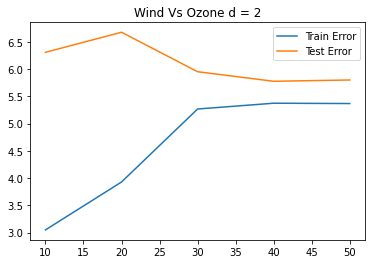

In [15]:
# Three cases d = 2, 5, 10
# For case d =2 
deg_true = 2
d = 2

# Choosing Five Cases
N = [10,20,30,40,50]

et = []
eg = []


for i in N:

    # train data and test data splitted bas
    x_train, y_train = np.array(x[:i]), np.array(y[:i])
    x_test, y_test = np.array(x[i:]), np.array(y[i:])
    
    # design matrix both train and test
    X_train = get_design_mat(x_train,d)
    X_test = get_design_mat(x_test,d)

    # parametrized predictor
    b = least_square_estimator(X_train,y_train)
    
    # Risk
    emp_r_train = emprical_risk(X_train,y_train,b)
    et.append(np.log(emp_r_train))
    emp_r_generalization = emprical_risk(X_test,y_test,b)
    eg.append(np.log(emp_r_generalization))

plt.title('Wind Vs Ozone d = 2')
plt.plot(N,et)
plt.plot(N,eg)
plt.legend(['Train Error', 'Test Error'])
plt.show()


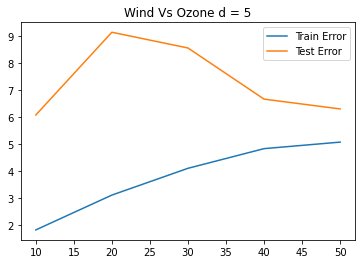

In [16]:
# Case d = 5
deg_true = 2
d = 5

# Choosing Five Cases
N = [10,20,30,40,50]

et = []
eg = []


for i in N:

    # train data and test data splitted bas
    x_train, y_train = np.array(x[:i]), np.array(y[:i])
    x_test, y_test = np.array(x[i:]), np.array(y[i:])
    
    # design matrix both train and test
    X_train = get_design_mat(x_train,d)
    X_test = get_design_mat(x_test,d)

    # parametrized predictor
    b = least_square_estimator(X_train,y_train)
    
    # Risk
    emp_r_train = emprical_risk(X_train,y_train,b)
    et.append(np.log(emp_r_train))
    emp_r_generalization = emprical_risk(X_test,y_test,b)
    eg.append(np.log(emp_r_generalization))

    
plt.title('Wind Vs Ozone d = 5')
plt.plot(N,et)
plt.plot(N,eg)
plt.legend(['Train Error', 'Test Error'])
plt.show()
# print(np.shape(X_train), np.shape(y_train), np.shape(b))
# print(np.shape(X_test), np.shape(y_test), np.shape(b))

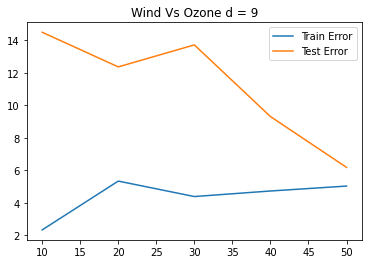

In [17]:
# Case d = 10 exploded so use d = 9

deg_true = 2
d = 9

# Choosing Five Cases
N = [10,20,30,40,50]

et = []
eg = []


for i in N:

    # train data and test data splitted bas
    x_train, y_train = np.array(x[:i]), np.array(y[:i])
    x_test, y_test = np.array(x[i:]), np.array(y[i:])
    
    # design matrix both train and test
    X_train = get_design_mat(x_train,d)
    X_test = get_design_mat(x_test,d)

    # parametrized predictor
    b = least_square_estimator(X_train,y_train)
    
    # Risk
    emp_r_train = emprical_risk(X_train,y_train,b)
    et.append(np.log(emp_r_train))
    emp_r_generalization = emprical_risk(X_test,y_test,b)
    eg.append(np.log(emp_r_generalization))

plt.title('Wind Vs Ozone d = 9')
plt.plot(N,et)
plt.plot(N,eg)
plt.legend(['Train Error', 'Test Error'])
plt.show()
